In [62]:
#PROBLEM SIX

#(1)
#See below, the code is there.

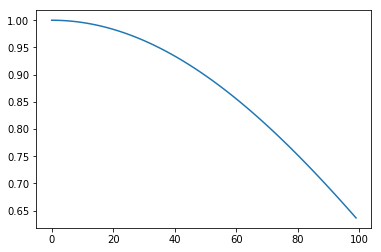

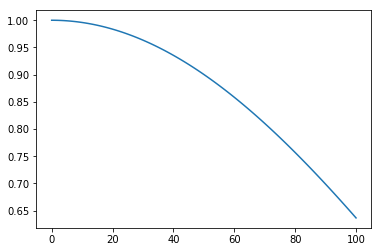

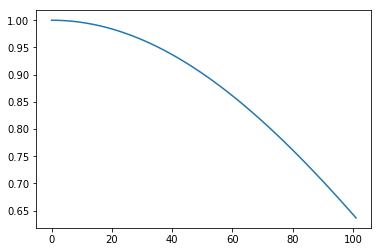

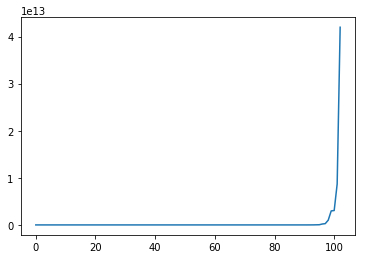

In [63]:
#(2)

import numpy as np
import matplotlib.pyplot as plt

def func(x):
    if x == 0:
        return 1
    else:
        return np.sin(x)/x

pts5 = np.linspace(0, math.pi/2, 5)
pts20 = np.linspace(0, math.pi/2, 20)
pts50 = np.linspace(0, math.pi/2, 50)
pts100 = np.linspace(0, math.pi/2, 100)

y5 = np.zeros(len(pts5))
y20 = np.zeros(len(pts20))
y50 = np.zeros(len(pts50))
y100 = np.zeros(len(pts100))


for i in range(0, len(y5)):
    if pts5[i] == 0:
        y5[i] = 1
    else:
        y5[i] = func(pts5[i])
        
for i in range(0, len(y20)):
    if pts20[i] == 0:
        y20[i] = 1
    else:
        y20[i] = func(pts20[i])
        
for i in range(0, len(y50)):
    if pts50[i] == 0:
        y50[i] = 1
    else:
        y50[i] = func(pts50[i])
        
for i in range(0, len(y100)):
    if pts100[i] == 0:
        y100[i] = 1
    else:
        y100[i] = func(pts100[i])

        
def coef(x, y):
    x.astype(float)
    y.astype(float)
    n = len(x)
    a = []
    for i in range(n):
        a.append(y[i])

    for j in range(1, n):

        for i in range(n-1, j-1, -1):
            a[i] = float(a[i]-a[i-1])/float(x[i]-x[i-j])

    return np.array(a) # return an array of coefficient


def Eval(a, x, r):
    x.astype(float)
    n = len( a ) - 1
    temp = a[n]
    for i in range( n - 1, -1, -1 ):
        temp = temp * ( r - x[i] ) + a[i]
    return temp

plt.figure(1)
table5 = coef(pts5, y5)
evalpts5 = np.linspace(0, math.pi/2, 100)
intpts5 = Eval(table5, pts5, evalpts5)
plt.plot(intpts5)

plt.figure(2)
table20 = coef(pts20, y20)
evalpts20 = np.linspace(0, math.pi/2, 101)
intpts20 = Eval(table20, pts20, evalpts20)
plt.plot(intpts20)

plt.figure(3)
table50 = coef(pts50, y50)
evalpts50 = np.linspace(0, math.pi/2, 102)
intpts50 = Eval(table50, pts50, evalpts50)
plt.plot(intpts50)

plt.figure(4)
table100 = coef(pts100, y100)
evalpts100 = np.linspace(0, math.pi/2, 103)
intpts100 = Eval(table100, pts100, evalpts100)
plt.plot(intpts100)

#Initially, the formulas are all in extremely close agreement about the correct formula for interpolating the function.
#However, with an extremely large number of points, they begin to suffer serious errors as they reach the outer bounds
#of the computer number system. We can see that it underflows right up until the last few points, at which point it 
#quickly diverges to infinity, and likely would overflow if we plotted it any further. This is probably
#because of an accumulation of cancellation errors as well as extremely tiny additions and subtractions, leading them 
#all to default to 0 until a critical point is reached, when they approach infinity.

PROBLEM FIVE PARTS A AND B

Start with the basis in part B as p(x). I am using a, b, c, d, e instead of $a_1, a_2...$.

We can then say the following...

$p(x) = a + b(x - x_0) + c(x - x_0)^2 + d(x - x_0)^2(x - x_1) + e(x - x_0)^2(x - x_1)(x - x_2)$

$p(x_0) = y_0 = a + 0 + 0 + 0 + 0$, so $a = y_0$.

$p'(x) = d(x - x_0)^2 + e(x - x_0)^2(x - x_2) + 2e(x - x_0)(x - x_1)(x - x_2) + e(x - x_0)^2(x - x_1) + 2d(x - x_0)(x - x_1) + 2c(x - x_0) + b$

$p'(x_0) = y_0' = 0 + 0 + 0 + 0 + 0 + 0 + b$, $b = y_0'$

$p'(x_2) = y_2' = d(2h)^2 + 0 + 0 + e(2h)^2(h) +2d(2h)(h) + 2c(2h) + y_0'$.

$p(x_1) = y_1 = y_0 + y_0'(x_1 - x_0) + c(x_1 - x_0)^2 + 0 + 0$. Substitute $x_1 = x_0 + h$, and this becomes $y_1 = y_0 + y_0'(h) + c(h)^2 + 0 + 0$. Then through some simple algebra, $ch^2 = y_1 - y_0 - y_0'h$, and $c = \frac{y_1 - y_0 - y_0'h}{h^2}$

We can then start plugging in. We know that...

$p(x_2) = y_2 = y_0 + 2hy_0' + (4y_1 - 4y_0 - 4y_0'h) + d4h^3$. Cancel terms...

$y_2 = 4y_1 - 3y_0 - 2y_0'h + d4h^3$. Isolate d...

$y_2 + 3y_0 - 4y_1 + 2y_0'h = d4h^3$. So then $d = \frac{y_2 + 3y_0 - 4y_1 + 2y_0'h}{4h^3}$.

Finally returning to the equation $p'(x_2) = y_2' = d(2h)^2 + 0 + 0 + e(2h)^2(h) +2d(2h)(h) + 2c(2h) + y_0'$, we can substitute in our values of c and d. So then we have...

$y_2' = \frac{y_2 + 3y_0 - 4y_1 + 2y_0'h}{4h^3}(2h)^2 + 0 + 0 + e(2h)^2(h) +2\frac{y_2 + 3y_0 - 4y_1 + 2y_0'h}{4h^3}(2h)(h) + 2\frac{y_1 - y_0 - y_0'h}{h^2}(2h) + y_0'$. Simplify...

$y_2' = \frac{y_2 + 3y_0 - 4y_1 + 2y_0'h}{h} + 4h^3e + \frac{y_2 + 3y_0 - 4y_1 + 2y_0'h}{h} + \frac{4y_1 - 4y_0 - 4y_0'h}{h} + \frac{y_0'h}{h}$. Simplify...

$y_2' = \frac{y_2 + 3y_0 - 4y_1 + 2y_0'h + y_0'h + y_2 + 3y_0 - 4y_1 + 2y_0'h + 4y_1 - 4y_0 - 4y_0'h}{h} + 4h^3e$. Cancel terms...

$y_2' = \frac{2y_2 + 2y_0 - 4y_1 + y_0'h}{h} + 4h^3e$. Isolate e...

$\frac{2y_2 - 2y_0 + 4y_1 - y_0'h + hy_2'}{h} = 4h^3e$, so $e = \frac{2y_2 - 2y_0 + 4y_1 - y_0'h + hy_2'}{4h^4}$.

So the final formula in the form requested by part B is...

$p(x) = y_0 + y_0'(x - x_0) + \frac{y_1 - y_0 - y_0'h}{h^2}(x - x_0)^2 + \frac{y_2 + 3y_0 - 4y_1 + 2y_0'h}{4h^3}(x - x_0)^2(x - x_1) + \frac{2y_2 - 2y_0 + 4y_1 - y_0'h + hy_2'}{4h^4}(x - x_0)^2(x - x_1)(x - x_2)$.

And with some simple algebra, the form for part A is...

$p(x) = y_0(1 - \frac{(x - x_0)^2}{h^2} + \frac{3(x - x_0)^2(x - x_1)}{4h^3} - \frac{(x - x_0)^2(x - x_1)(x - x_2)}{2h^4}) + y_1(\frac{(x - x_0)^2}{h^2} - \frac{(x - x_0)^2(x - x_1)}{h^3} + \frac{(x - x_0)^2(x - x_1)(x - x_2)}{h^4}) + y_2(\frac{(x - x_0)^2(x - x_1)}{4h^3} + \frac{(x - x_0)^2(x - x_1)(x - x_2)}{2h^4}) + y_0'((x - x_0) - \frac{(x - x_0)^2}{h^2} + \frac{(x - x_0)^2(x - x_1)}{4h^3} + \frac{(x - x_0)^2(x - x_1)(x - x_2)}{2h^4}) + y_2'(\frac{(x - x_0)^2(x - x_1)(x - x_2)}{4h^3})$

PROBLEM FOUR

Let us first solve the equation at the derivative, since the majority of the given points are for p', not p. We will use the Lagrange basis.

We have that $p'(x_0) = y_0'$, and that $p'(x_1) = y_1'$. So the Lagrange interpolant for the derivative is $p'(x) = a(x - x_0) + b(x - x_1).$ We need $p'(x_0) = y_0' = a(x_0 - x_0) + b(x_0 - x_1)$. The $a(x_0 - x_0)$ is 0 here, so we only need $b = \frac{y_0'}{x_0 - x_1}$, and a is still unknown. 

We then have $p'(x_1) = y_1' = a(x_1 - x_0) + \frac{y_0'}{x_0 - x_1}(x_1 - x_1)$. Clearly, $a = \frac{y_1'}{x_1 - x_0}$. So the final Lagrange equation for the derivative is $p'(x) = \frac{y_1'}{x_1 - x_0}(x - x_0) + \frac{y_0'}{x_0 - x_1}(x - x_1) = \frac{y_1' x}{x_1 - x_0} - \frac{y_1' x_0}{x_1 - x_0} + \frac{y_0' x}{x_0 - x_1} - \frac{y_0' x_1}{x_0 - x_1}$. 

We then integrate this to get $p(x) = \frac{x^2 y_1'}{2(x_1 - x_0)} - \frac{x y_1' x_0}{x_1 - x_0} + \frac{x^2 y_0'}{2(x_0 - x_1)} - \frac{x y_0' x_1}{x_0 - x_1} + C$, where C is a constant. Plug in $ x = x_0, p(x_0) = y_0$ to solve for the final constant. 

So then we have $p(x_0) = y_0 = \frac{x_0^2 \ y_1'}{2(x_1 - x_0)} - \frac{y_1' \ x_0^2}{x_1 - x_0} + \frac{x_0^2 \ y_0'}{2(x_0 - x_1)} - \frac{x_0 \ y_0' \ x_1}{x_0 - x_1} + C$. Subtract C and $y_0$ from both sides, and you get $-C = \frac{x_0^2 \ y_1'}{2(x_1 - x_0)} - \frac{y_1' \ x_0^2}{x_1 - x_0} + \frac{x_0^2 \ y_0'}{2(x_0 - x_1)} - \frac{x_0 \ y_0' \ x_1}{x_0 - x_1} - y_0$. 

So set $C =  -\frac{x_0^2 \ y_1'}{2(x_1 - x_0)} + \frac{y_1' \ x_0^2}{x_1 - x_0} - \frac{x_0^2 \ y_0'}{2(x_0 - x_1)} + \frac{x_0 \ y_0' \ x_1}{x_0 - x_1} + y_0$, and the equation is solved. We reorder it to be in the desired form, and the final equation is...

$p(x) = \frac{x^2 y_1'}{2(x_1 - x_0)} - \frac{x y_1' x_0}{x_1 - x_0} + \frac{x^2 y_0'}{2(x_0 - x_1)} - \frac{x y_0' x_1}{x_0 - x_1} - \frac{x_0^2 \ y_1'}{2(x_1 - x_0)} + \frac{y_1' \ x_0^2}{x_1 - x_0} - \frac{x_0^2 \ y_0'}{2(x_0 - x_1)} + \frac{x_0 \ y_0' \ x_1}{x_0 - x_1} + y_0$

Rewrite it in the form given by the problem

$p(x) = y_1'(\frac{x^2}{2(x_1 - x_0)} - \frac{x \ x_0}{x_1 - x_0} - \frac{x_0^2}{2(x_1 - x_0)} + \frac{x_0^2}{x_1 - x_0}) + y_0'(\frac{x^2}{2(x_0 - x_1)} - \frac{x \ x_1}{x_0 - x_1}  - \frac{x_0^2}{2(x_0 - x_1)} + \frac{x_0 \ x_1}{x_0 - x_1}) + y_0$

Simplify

$p(x) = y_1'(\frac{x^2}{2(x_1 - x_0)} - \frac{x \ x_0}{x_1 - x_0} + \frac{x_0^2}{2(x_1 - x_0)}) + y_0'(\frac{x^2}{2(x_0 - x_1)} - \frac{x \ x_1}{x_0 - x_1}  - \frac{x_0^2}{2(x_0 - x_1)} + \frac{x_0 \ x_1}{x_0 - x_1}) + y_0$

And we have our final formula.